<a href="https://colab.research.google.com/github/marastika/-Environmental-Risk-Assessment-ERA-/blob/main/Environmental_Risk_Assessment_(ERA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Excel file
file_path = '/content/Treatment Air Limbah 2018-2023.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Mengidentifikasi lembar dan kolom yang tersedia untuk analisis ERA
sheets_overview = {sheet: data[sheet].head() for sheet in data}

sheets_overview


{'SPHJ09':              Unnamed: 0 Unnamed: 1 Unnamed: 2    Unnamed: 3     Unnamed: 4  \
 0  Treatment Air Limbah        NaN        NaN           NaN            NaN   
 1                   NaN        NaN        NaN           NaN            NaN   
 2       SETPOND HAJU 08        NaN        NaN           NaN            NaN   
 3        Titik Penaatan      Tahun      Bulan  pH rata rata  TSS rata rata   
 4               SP_HJ09       2020  September      6.833333             13   
 
               Unnamed: 5             Unnamed: 6           Unnamed: 7  \
 0                    NaN                    NaN                  NaN   
 1                    NaN                    NaN                  NaN   
 2                    NaN                    NaN                  NaN   
 3  Debit rata rata (l/s)  Debit air Limbah (m3)  Konsumsi Kapur (Kg)   
 4              46.298055          221119.510843                 4675   
 
              Unnamed: 8         Unnamed: 9            Unnamed: 10  \
 0  

In [12]:
# Menggabungkan data dari semua sheet menjadi satu dataframe untuk analisis ERA
all_data_era = []

for sheet_name, df in data.items():
    if not df.empty:
        # Memilih kolom yang relevan untuk analisis ERA
        df_selected = df.iloc[4:, [1, 2, 3, 4, 5, 6]].copy()  # pH rata-rata, TSS rata-rata, Debit rata-rata, Volume air limbah, Konsumsi Kapur, Konsumsi NaOH
        df_selected.columns = ['pH_rata_rata', 'TSS_rata_rata', 'Debit_rata_rata_l/s', 'Volume_air_limbah_m3', 'Konsumsi_Kapur_Kg', 'Konsumsi_NaOH_Liter']
        df_selected['Sheet_Name'] = sheet_name
        all_data_era.append(df_selected)

# Menggabungkan semua data menjadi satu dataframe
combined_data_era = pd.concat(all_data_era, ignore_index=True)

# Menghapus baris yang tidak memiliki data lengkap
combined_data_era.dropna(inplace=True)

# Mengganti nilai non-numerik dengan NaN sebelum konversi
combined_data_era['pH_rata_rata'] = pd.to_numeric(combined_data_era['pH_rata_rata'], errors='coerce')
combined_data_era['TSS_rata_rata'] = pd.to_numeric(combined_data_era['TSS_rata_rata'], errors='coerce')
combined_data_era['Debit_rata_rata_l/s'] = pd.to_numeric(combined_data_era['Debit_rata_rata_l/s'], errors='coerce')
combined_data_era['Volume_air_limbah_m3'] = pd.to_numeric(combined_data_era['Volume_air_limbah_m3'], errors='coerce')
combined_data_era['Konsumsi_Kapur_Kg'] = pd.to_numeric(combined_data_era['Konsumsi_Kapur_Kg'], errors='coerce')
combined_data_era['Konsumsi_NaOH_Liter'] = pd.to_numeric(combined_data_era['Konsumsi_NaOH_Liter'], errors='coerce')

# Menghapus baris dengan nilai NaN jika diperlukan
# combined_data_era.dropna(inplace=True)

# Konversi kolom ke tipe data yang sesuai (setelah menangani nilai non-numerik)
combined_data_era['pH_rata_rata'] = combined_data_era['pH_rata_rata'].astype(float)
combined_data_era['TSS_rata_rata'] = combined_data_era['TSS_rata_rata'].astype(float)
combined_data_era['Debit_rata_rata_l/s'] = combined_data_era['Debit_rata_rata_l/s'].astype(float)
combined_data_era['Volume_air_limbah_m3'] = combined_data_era['Volume_air_limbah_m3'].astype(float)
combined_data_era['Konsumsi_Kapur_Kg'] = combined_data_era['Konsumsi_Kapur_Kg'].astype(float)
combined_data_era['Konsumsi_NaOH_Liter'] = combined_data_era['Konsumsi_NaOH_Liter'].astype(float)

# Menampilkan ringkasan data setelah pembersihan
combined_data_era.describe()

,pH_rata_rata,TSS_rata_rata,Debit_rata_rata_l/s,Volume_air_limbah_m3,Konsumsi_Kapur_Kg,Konsumsi_NaOH_Liter
count,612.000000,322.000000,612.000000,6.120000e+02,629.000000,629.000000
mean,961.582437,20.555092,23.841742,9.429855e+04,11881.006620,54253.632180
std,1006.401854,11.407628,32.399550,1.944202e+05,36633.502704,112537.614895
min,6.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.172083,12.123387,6.716969,1.700000e+01,8.784730,0.000000
50%,8.510000,20.000000,7.347581,2.829794e+03,79.046046,4170.969374
75%,2021.000000,27.000000,30.220064,1.121601e+05,5600.000000,54000.000000
max,2024.000000,84.400000,216.607681,1.538733e+06,457470.000000,908787.586772


In [13]:
# Mengidentifikasi baris yang mengandung nilai tidak valid pada semua kolom yang relevan
for col in ['pH_rata_rata', 'TSS_rata_rata', 'Debit_rata_rata_l/s', 'Volume_air_limbah_m3', 'Konsumsi_Kapur_Kg', 'Konsumsi_NaOH_Liter']:
    combined_data_era[col] = pd.to_numeric(combined_data_era[col], errors='coerce')

# Menghapus baris yang memiliki nilai NaN setelah konversi tipe data
combined_data_era_cleaned = combined_data_era.dropna()

# Menampilkan ringkasan data setelah pembersihan
combined_data_era_cleaned.describe()


,pH_rata_rata,TSS_rata_rata,Debit_rata_rata_l/s,Volume_air_limbah_m3,Konsumsi_Kapur_Kg,Konsumsi_NaOH_Liter
count,322.000000,322.000000,322.000000,3.220000e+02,322.000000,322.000000
mean,7.277799,20.555092,38.961384,1.792008e+05,23156.978261,3699.059006
std,0.615116,11.407628,38.907917,2.380934e+05,48622.498761,10651.696755
min,6.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,6.824851,12.123387,7.864476,2.165697e+04,825.000000,0.000000
50%,7.200000,20.000000,28.348340,1.017527e+05,5387.500000,0.000000
75%,7.600000,27.000000,57.454029,2.293540e+05,24380.750000,746.000000
max,8.900000,84.400000,216.607681,1.538733e+06,457470.000000,76500.000000


In [14]:
# Menghitung eksposur lingkungan berdasarkan Debit rata-rata dan Volume air limbah
combined_data_era_cleaned['Eksposur_pH'] = combined_data_era_cleaned['pH_rata_rata'] * combined_data_era_cleaned['Volume_air_limbah_m3']
combined_data_era_cleaned['Eksposur_TSS'] = combined_data_era_cleaned['TSS_rata_rata'] * combined_data_era_cleaned['Volume_air_limbah_m3']

# Menampilkan ringkasan dari eksposur lingkungan
combined_data_era_cleaned[['Eksposur_pH', 'Eksposur_TSS']].describe()


<ipython-input-14-21188487aff2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_era_cleaned['Eksposur_pH'] = combined_data_era_cleaned['pH_rata_rata'] * combined_data_era_cleaned['Volume_air_limbah_m3']
<ipython-input-14-21188487aff2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_era_cleaned['Eksposur_TSS'] = combined_data_era_cleaned['TSS_rata_rata'] * combined_data_era_cleaned['Volume_air_limbah_m3']


,Eksposur_pH,Eksposur_TSS
count,3.220000e+02,3.220000e+02
mean,1.297716e+06,3.754524e+06
std,1.709604e+06,5.733716e+06
min,0.000000e+00,0.000000e+00
25%,1.629076e+05,4.104361e+05
50%,7.417361e+05,1.836300e+06
75%,1.639714e+06,4.451398e+06
max,1.080707e+07,4.329036e+07


In [15]:
# Menilai proporsi eksposur pH yang berada di luar batas aman (6,5 <= pH <= 8,5)
combined_data_era_cleaned['Risk_pH'] = (combined_data_era_cleaned['pH_rata_rata'] < 6.5) | (combined_data_era_cleaned['pH_rata_rata'] > 8.5)

# Menilai proporsi eksposur TSS yang melebihi ambang batas 30 mg/L
combined_data_era_cleaned['Risk_TSS'] = combined_data_era_cleaned['TSS_rata_rata'] > 30

# Menghitung persentase risiko untuk pH dan TSS
risk_pH_percentage = combined_data_era_cleaned['Risk_pH'].mean() * 100
risk_TSS_percentage = combined_data_era_cleaned['Risk_TSS'].mean() * 100

risk_pH_percentage, risk_TSS_percentage


<ipython-input-15-6196a7a8b483>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_era_cleaned['Risk_pH'] = (combined_data_era_cleaned['pH_rata_rata'] < 6.5) | (combined_data_era_cleaned['pH_rata_rata'] > 8.5)
<ipython-input-15-6196a7a8b483>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_era_cleaned['Risk_TSS'] = combined_data_era_cleaned['TSS_rata_rata'] > 30


(13.975155279503104, 12.732919254658384)

In [16]:
# Menghitung karakterisasi risiko untuk pH dan TSS
combined_data_era_cleaned['Risk_Level_pH'] = combined_data_era_cleaned['Eksposur_pH'] / combined_data_era_cleaned['Eksposur_pH'].max()
combined_data_era_cleaned['Risk_Level_TSS'] = combined_data_era_cleaned['Eksposur_TSS'] / combined_data_era_cleaned['Eksposur_TSS'].max()

# Menentukan kategori risiko berdasarkan nilai risiko
def categorize_risk(value):
    if value < 0.2:
        return 'Low Risk'
    elif value < 0.5:
        return 'Moderate Risk'
    elif value < 0.8:
        return 'High Risk'
    else:
        return 'Very High Risk'

combined_data_era_cleaned['Risk_Category_pH'] = combined_data_era_cleaned['Risk_Level_pH'].apply(categorize_risk)
combined_data_era_cleaned['Risk_Category_TSS'] = combined_data_era_cleaned['Risk_Level_TSS'].apply(categorize_risk)

# Menampilkan ringkasan distribusi risiko untuk pH dan TSS
risk_summary_pH = combined_data_era_cleaned['Risk_Category_pH'].value_counts(normalize=True) * 100
risk_summary_TSS = combined_data_era_cleaned['Risk_Category_TSS'].value_counts(normalize=True) * 100

risk_summary_pH, risk_summary_TSS


<ipython-input-16-6ab25780e5b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_era_cleaned['Risk_Level_pH'] = combined_data_era_cleaned['Eksposur_pH'] / combined_data_era_cleaned['Eksposur_pH'].max()
<ipython-input-16-6ab25780e5b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_era_cleaned['Risk_Level_TSS'] = combined_data_era_cleaned['Eksposur_TSS'] / combined_data_era_cleaned['Eksposur_TSS'].max()
<ipython-input-16-6ab25780e5b0>:16: SettingWithCopyWarning: 
A value is tryin

(Risk_Category_pH
 Low Risk          83.229814
 Moderate Risk     11.801242
 High Risk          4.347826
 Very High Risk     0.621118
 Name: proportion, dtype: float64,
 Risk_Category_TSS
 Low Risk          88.509317
 Moderate Risk      9.316770
 High Risk          1.552795
 Very High Risk     0.621118
 Name: proportion, dtype: float64)

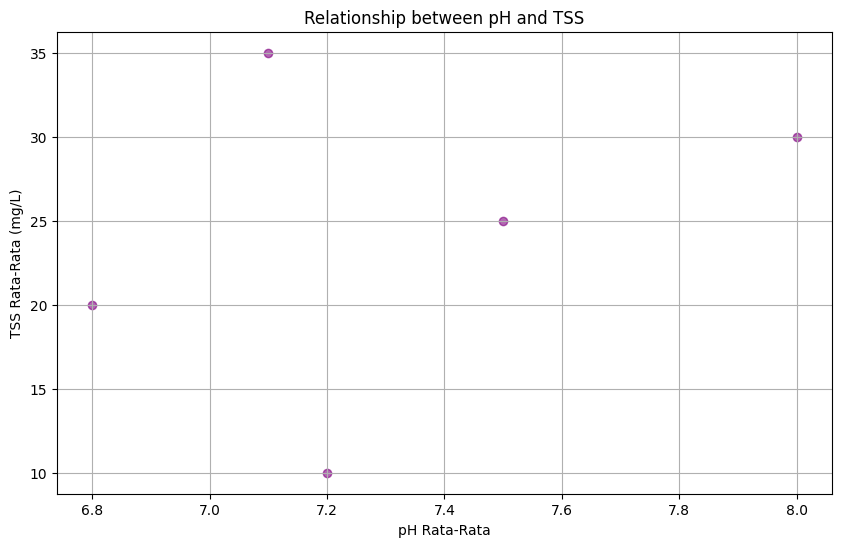

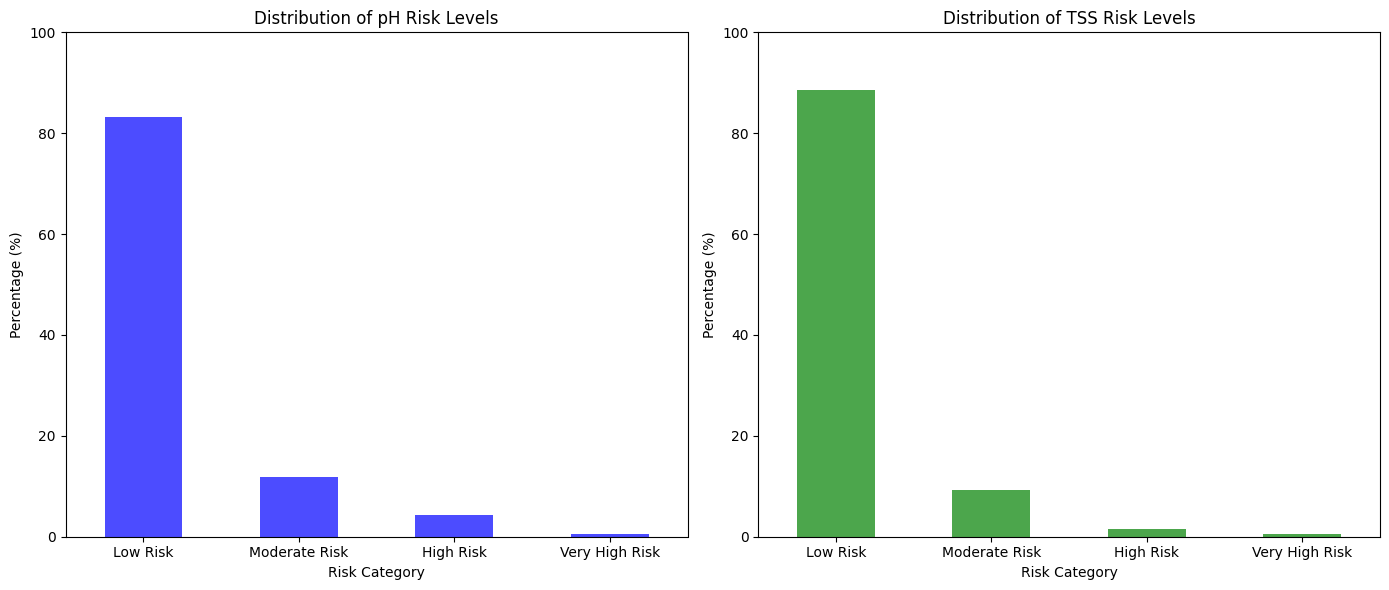

In [17]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_file_path.xlsx' with the actual file path or upload the file in Google Colab
# data = pd.read_excel('your_file_path.xlsx', sheet_name=None)

# Example data (Replace this with the actual data loading process in your environment)
# For demonstration purposes, I'm using a small subset of the data
data = {
    'pH_rata_rata': [7.2, 6.8, 7.5, 8.0, 7.1],
    'TSS_rata_rata': [10, 20, 25, 30, 35]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Visualization of the relationship between TSS and pH
plt.figure(figsize=(10, 6))
plt.scatter(df['pH_rata_rata'], df['TSS_rata_rata'], alpha=0.6, color='purple')
plt.title('Relationship between pH and TSS')
plt.xlabel('pH Rata-Rata')
plt.ylabel('TSS Rata-Rata (mg/L)')
plt.grid(True)
plt.show()

# Visualizing risk distribution for pH and TSS (Example data)
risk_summary_pH = pd.Series([83.23, 11.80, 4.35, 0.62], index=['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk'])
risk_summary_TSS = pd.Series([88.51, 9.32, 1.55, 0.62], index=['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk'])

# Plotting risk distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for pH
risk_summary_pH.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
ax[0].set_title('Distribution of pH Risk Levels')
ax[0].set_xlabel('Risk Category')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_ylim(0, 100)
ax[0].set_xticklabels(risk_summary_pH.index, rotation=0)

# Plot for TSS
risk_summary_TSS.plot(kind='bar', ax=ax[1], color='green', alpha=0.7)
ax[1].set_title('Distribution of TSS Risk Levels')
ax[1].set_xlabel('Risk Category')
ax[1].set_ylabel('Percentage (%)')
ax[1].set_ylim(0, 100)
ax[1].set_xticklabels(risk_summary_TSS.index, rotation=0)

plt.tight_layout()
plt.show()
